In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn
import seaborn as sns; sns.set(style="white", color_codes=True)
from scipy import stats

cov = np.array([[1, 0.8], [0.8, 3]])
mu = np.array([0,2])
r = mvn.rvs(mean=mu, cov=cov, size=1000)



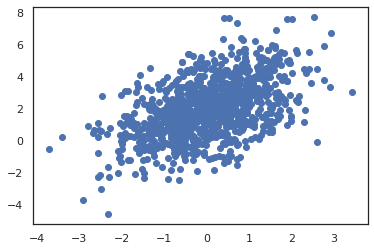

In [3]:
plt.scatter(r[:,0], r[:,1])
plt.show()

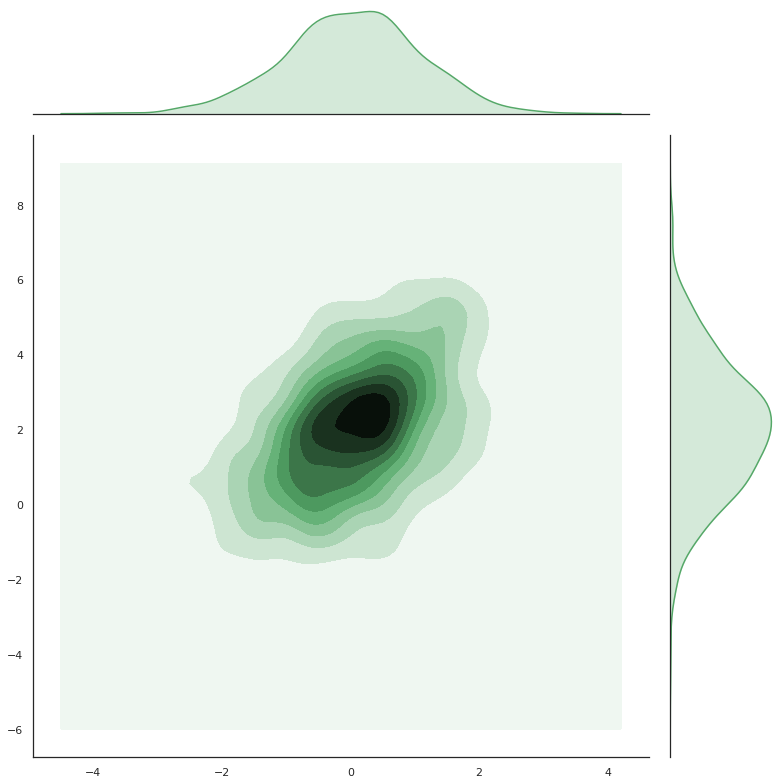

In [4]:
g = sns.jointplot(x=r[:,0], y=r[:,1], kind="kde", color="g", height=11)  # "reg", "kde"

In [65]:
 
data = np.c_[r[:,0], r[:,1]]
kde = stats.gaussian_kde(data.T, bw_method="scott")
data_std = data.std(axis=0, ddof=1)
bw_x = kde.scotts_factor() * data_std[0]
bw_y = kde.scotts_factor() * data_std[1]
gridsize = 1000
cut = 3
clip = [(-np.inf, np.inf), (-np.inf, np.inf)]
x_support = sns.utils._kde_support(data[:, 0], bw_x, gridsize, cut, clip[0])
y_support = sns.utils._kde_support(data[:, 1], bw_y, gridsize, cut, clip[1])
xx, yy = np.meshgrid(x_support, y_support)
z = kde([xx.ravel(), yy.ravel()]).reshape(xx.shape)

In [66]:
r1 = r[r[:,1] < 2.01]
r2 = r1[1.99 < r1[:,1]]
r2

array([[-9.28873387e-01,  1.99976017e+00],
       [-4.80269920e-01,  2.00441153e+00],
       [ 1.27722537e-01,  1.99657311e+00],
       [ 8.26530626e-01,  1.99204533e+00],
       [-1.99816705e-03,  2.00082919e+00]])

In [69]:
np.where((r[:,1] < 2.01) & (1.99 < r[:,1]) & (r[:,0] < 0))

(array([317, 332, 734]),)

In [46]:
g.ax_joint.contourf(xx, yy, z, 10)

In [62]:
g.ax_joint.xcorr(x=r[:,0], y=r[:,1])

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([ 5.53344178e-03, -2.82043962e-03, -5.43309576e-02,  1.76568498e-02,
         2.13909304e-03,  1.30131389e-02, -4.23240583e-03,  2.20781654e-06,
        -3.91755998e-03, -4.51542593e-02,  3.07904937e-01, -2.84929247e-02,
         2.07268665e-02, -2.82261392e-02, -6.43008223e-03,  9.98010162e-04,
        -1.82465413e-02, -7.63282525e-03,  1.29220800e-02, -6.34589914e-03,
        -2.14418764e-02]),
 <matplotlib.lines.Line2D at 0x7f10955ccac8>)

In [ ]:
X=g.ax_marg_x.get_lines()[0].get_xdata()

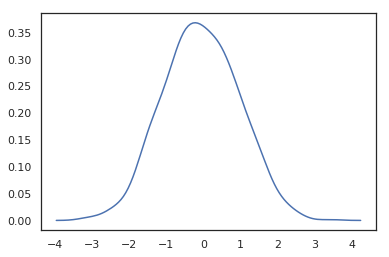

In [20]:
X=g.ax_marg_x.get_lines()[0].get_xdata()# x-coordinate of points along the regression line
Y=g.ax_marg_x.get_lines()[0].get_ydata()# y-coordinate
plt.plot(X, Y)

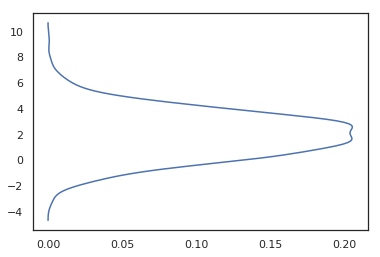

In [21]:
X=g.ax_marg_y.get_lines()[0].get_xdata()# x-coordinate of points along the regression line
Y=g.ax_marg_y.get_lines()[0].get_ydata()# y-coordinate
plt.plot(X, Y)

In [24]:
dir(g.ax_joint)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_hold',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_mouseover',
 '_m

In [26]:
g.ax_joint.get_data_ratio()

1.877728274959614

In [30]:
g.ax_joint.get_lines()

<a list of 0 Line2D objects>

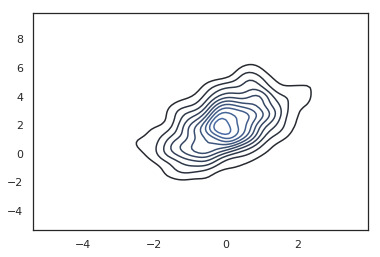

In [35]:
g2 = sns.kdeplot(r[:,0], r[:,1])